In [ ]:
###The objective of this assessment is to evaluate your understanding and ability to apply supervised learning techniques to a real-world dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
###1. Loading and Preprocessing
###Load the breast cancer dataset from sklearn.
###Preprocess the data to handle any missing values and perform necessary feature scaling.
###Explain the preprocessing steps you performed and justify why they are necessary for this dataset.

In [2]:
CD= pd.read_csv("breast-cancer.csv")
CD

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
CD.shape

(569, 32)

In [4]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
CD.isnull().sum()  # NO NULL VALUES

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
CD.duplicated().sum() #NO DUPLICATE VALUES

0

In [7]:
print ("Total number of diagnosis are ", str(CD.shape[0]), ", ", CD.diagnosis.value_counts()['B'], "Benign and Malignant are",
       CD.diagnosis.value_counts()['M'])

Total number of diagnosis are  569 ,  357 Benign and Malignant are 212


In [8]:
## check garbage values (unique value and its frequency)

for column in CD.select_dtypes(include="object").columns:
    print(f"{CD[column].value_counts()}\n")
## NO GARBAGE VALUES

diagnosis
B    357
M    212
Name: count, dtype: int64



In [9]:
Diagnosis_cnt = CD['diagnosis'].value_counts()
Diagnosis_cnt.reset_index()

,diagnosis,count
0,B,357
1,M,212


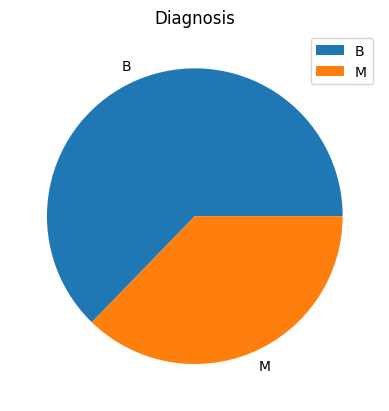

In [10]:
plt.pie(x= Diagnosis_cnt.values,labels = Diagnosis_cnt.index)
plt.title("Diagnosis")
plt.legend()
plt.show()

In [11]:
x = CD.drop(columns = 'diagnosis')
y =CD['diagnosis']

In [12]:
x_train , x_test , y_train , y_test  = train_test_split(x,y,test_size = 0.2)


In [13]:
print(x_train.shape , y_train.shape , x_test.shape ,y_test.shape)


(455, 31) (455,) (114, 31) (114,)


In [14]:
scale = StandardScaler() 
x = scale.fit_transform(x)

In [15]:
label = LabelEncoder()
y = label.fit_transform(y)

In [17]:
SVM_model = SVC()
LR_model = LogisticRegression(max_iter =10000)
DT_model = DecisionTreeClassifier()
RFC_model = RandomForestClassifier()
knc_model = KNeighborsClassifier()

SVM_model.fit(x_train, y_train)
LR_model.fit(x_train, y_train)
DT_model.fit(x_train, y_train)
RFC_model.fit(x_train, y_train)
knc_model.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
SVM_y_pred = SVM_model.predict(x_test)
LR_y_pred = LR_model.predict(x_test)
DT_y_pred = DT_model.predict(x_test)
RFC_y_pred = RFC_model.predict(x_test)
knc_y_pred = knc_model.predict(x_test)

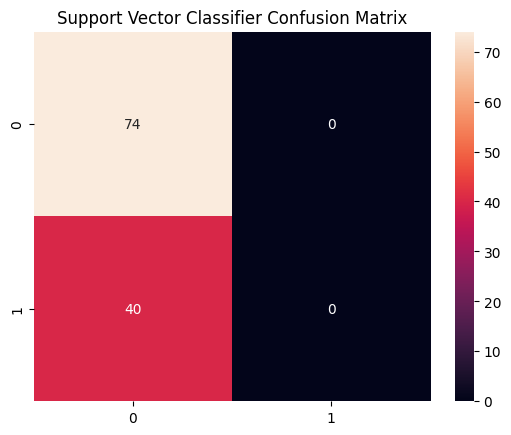

              precision    recall  f1-score   support

      Benign       0.65      1.00      0.79        74
   Malignant       0.00      0.00      0.00        40

    accuracy                           0.65       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.42      0.65      0.51       114



C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Dell\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

In [20]:
SVM = confusion_matrix(y_test, SVM_y_pred)
LR = confusion_matrix(y_test, LR_y_pred)
DT = confusion_matrix(y_test, DT_y_pred)
RFC = confusion_matrix(y_test, RFC_y_pred)
knc = confusion_matrix(y_test, knc_y_pred)

sns.heatmap(SVM,annot =True)

plt.title("Support Vector Classifier Confusion Matrix")
plt.show()

report = classification_report(y_test, SVM_y_pred, target_names=['Benign', 'Malignant'])
print(report)

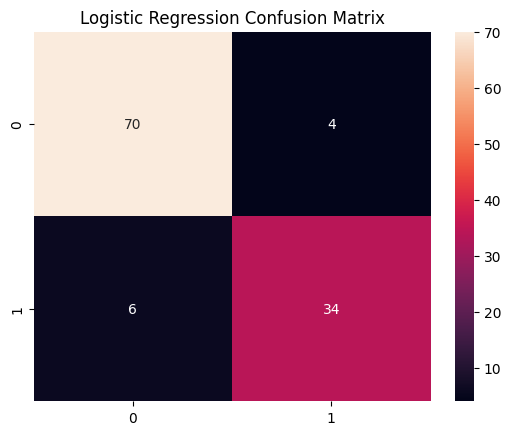

              precision    recall  f1-score   support

      Benign       0.92      0.95      0.93        74
   Malignant       0.89      0.85      0.87        40

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114



In [21]:
sns.heatmap(LR,annot =True)

plt.title("Logistic Regression Confusion Matrix")
plt.show()

report = classification_report(y_test, LR_y_pred, target_names=['Benign', 'Malignant'])
print(report)

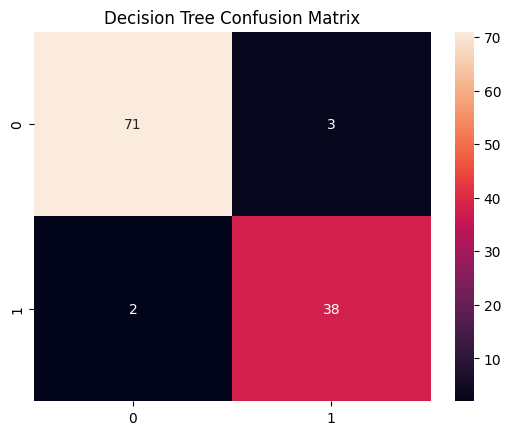

              precision    recall  f1-score   support

      Benign       0.97      0.96      0.97        74
   Malignant       0.93      0.95      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [22]:
sns.heatmap(DT,annot =True)

plt.title("Decision Tree Confusion Matrix")
plt.show()

report = classification_report(y_test, DT_y_pred, target_names=['Benign', 'Malignant'])
print(report)

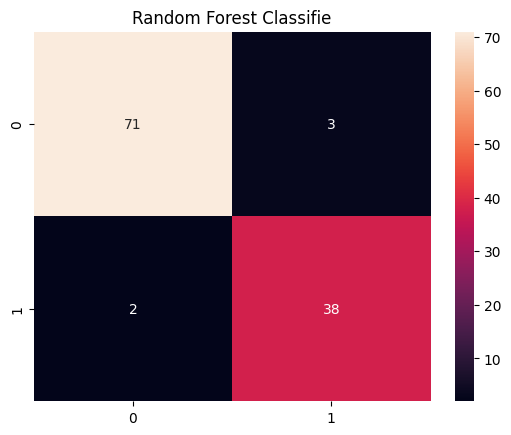

              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        74
   Malignant       0.97      0.97      0.97        40

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [23]:
sns.heatmap(DT,annot =True)

plt.title("Random Forest Classified")
plt.show()

report = classification_report(y_test, RFC_y_pred, target_names=['Benign', 'Malignant'])
print(report)

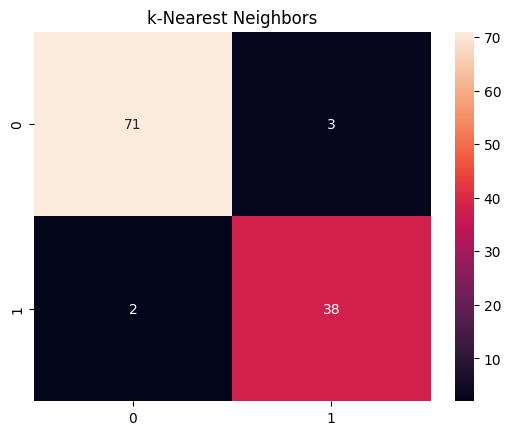

              precision    recall  f1-score   support

      Benign       0.77      0.95      0.85        74
   Malignant       0.83      0.47      0.60        40

    accuracy                           0.78       114
   macro avg       0.80      0.71      0.73       114
weighted avg       0.79      0.78      0.76       114



In [24]:
sns.heatmap(DT,annot =True)

plt.title("k-Nearest Neighbors")
plt.show()

report = classification_report(y_test, knc_y_pred, target_names=['Benign', 'Malignant'])
print(report)